In [1]:
#load packages
import pandas as pd
import numpy as np

# Preprocessing

In [2]:
#read in data
data=pd.read_csv("allegations_202007271729.csv")
pre_data=pd.read_csv("NYC_Precincts.csv")

In [3]:
#viewing the main df
data.head(2)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [4]:
#viewing the precinct data
pre_data.head(2)

,Prec_Address,Prec_Borough,precinct,Latitude,Longitude
0,16 Ericsson Place,Manhattan,1,40.720371,-74.007072
1,19 Elizabeth Street,Manhattan,5,40.716179,-73.997490


In [5]:
#joining precinct locations
resultdf=data.merge(pre_data,how="left",on="precinct")
resultdf.head(2)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,Prec_Address,Prec_Borough,Latitude,Longitude
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),65 6th Avenue,Brooklyn,40.680572,-73.974312
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335


In [6]:
#checking for nulls
resultdf.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
fado_type                      0
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
board_disposition              0
Prec_Address                  48
Prec_Borough                  48
Latitude                      48
Longitude 

In [7]:
# concatenate month and year and assign 01 to the day to get a date column
resultdf['date_received'] = pd.to_datetime(resultdf.year_received.astype(str) + '/' + resultdf.month_received.astype(str) + '/01')
resultdf['date_closed'] = pd.to_datetime(resultdf.year_closed.astype(str) + '/' + resultdf.month_closed.astype(str) + '/01')

In [8]:
# replace black by african american and null with unknown
# replace null in gender to unknown
# replace null in outcome description to unknown
# replace null in allegation to unknown
# replace null in location and address to unknown
resultdf['complainant_ethnicity'] = resultdf['complainant_ethnicity'].replace([np.nan, 'Black'], ['Unknown', 'African American'])
resultdf['mos_ethnicity'] = resultdf['mos_ethnicity'].replace(['Black'], ['African American'])
resultdf['complainant_gender'] = resultdf['complainant_gender'].replace([np.nan], ['Unknown'])
resultdf['outcome_description'] = resultdf['outcome_description'].replace([np.nan], ['Unknown'])
resultdf['allegation'] = resultdf['allegation'].replace([np.nan], ['Unknown'])
resultdf['Prec_Borough '] = resultdf['Prec_Borough '].replace([np.nan], ['Unknown'])
resultdf['Prec_Address'] = resultdf['Prec_Address'].replace([np.nan], ['Unknown'])

In [9]:
# clean contact_reason column using 80 - 20 rule

def reason_for_contact(contact_reason):
    if isinstance(contact_reason, str): 
        if any(keyword in contact_reason for keyword in ['aided','Aided']):
            return 'Aided Case'
        elif any(keyword in contact_reason for keyword in ['suspected']):
            return 'PD suspected Violation/Crime'
        elif any(keyword in contact_reason for keyword in ['Traffic','Parking', 'VTL']):
            return 'Vehicle/Traffic Violation'
        elif any(keyword in contact_reason for keyword in ['Report', 'report']):
            return 'Report of Violation/Crime'
        elif any(keyword in contact_reason for keyword in ['arrest', 'Arrest', 'warrant']):
            return 'Execution of Arrest/Warrant'
        elif any(keyword in contact_reason for keyword in ['3rd']):
            return 'Intervened on behalf of 3rd Party'
        elif 'Moving violation' in contact_reason:
            return 'Moving Violation'
        else:
            return 'Other'
    else:
        return None
resultdf['reason_for_contact'] = resultdf['contact_reason'].apply(reason_for_contact)
resultdf.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,contact_reason,outcome_description,board_disposition,Prec_Address,Prec_Borough,Latitude,Longitude,date_received,date_closed,reason_for_contact
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),65 6th Avenue,Brooklyn,40.680572,-73.974312,2019-07-01,2020-05-01,Report of Violation/Crime
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Moving violation,Moving violation summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2011-11-01,2012-08-01,Moving Violation
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Moving violation,Moving violation summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2011-11-01,2012-08-01,Moving Violation
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2012-07-01,2013-09-01,PD suspected Violation/Crime
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2018-08-01,2019-02-01,Report of Violation/Crime


In [10]:
#Dropping Precincts 0 and 1000 because they do not exist, potential data entry error
#Do not need to drop nulls because they are not bad data, just unknown. 
resultdf.drop(resultdf[resultdf.precinct == 1000].index, inplace=True)
resultdf.drop(resultdf[resultdf.precinct == 0].index, inplace=True)

In [11]:
resultdf.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1532
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity          0
complainant_gender             0
complainant_age_incident    4793
fado_type                      0
allegation                     0
precinct                      24
contact_reason               196
outcome_description            0
board_disposition              0
Prec_Address                   0
Prec_Borough                   0
Latitude                      24
Longitude 

In [12]:
# replace null in reason_for_contact to unknown
resultdf['reason_for_contact'] = resultdf['reason_for_contact'].replace([np.nan], ['Unknown'])
resultdf['contact_reason'] = resultdf['contact_reason'].replace([np.nan], ['Unknown'])

In [13]:
resultdf.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1532
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity          0
complainant_gender             0
complainant_age_incident    4793
fado_type                      0
allegation                     0
precinct                      24
contact_reason                 0
outcome_description            0
board_disposition              0
Prec_Address                   0
Prec_Borough                   0
Latitude                      24
Longitude 

In [14]:
CountStatus = pd.value_counts(resultdf['reason_for_contact'].values, sort=True)
CountStatus

PD suspected Violation/Crime         15981
Other                                 6323
Report of Violation/Crime             3920
Vehicle/Traffic Violation             2188
Moving Violation                      1983
Execution of Arrest/Warrant           1714
Intervened on behalf of 3rd Party      540
Aided Case                             489
Unknown                                196
dtype: int64

In [15]:
# downloadind clean data
resultdf.to_csv('allegations_v3.csv')

# Visuals 

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('PowerBI_Exported_Data.csv')

In [18]:
df.head(2)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,Prec_Borough,Latitude,Longitude,date_received,date_closed,reason_for_contact,Action Time (Months),board_disposition,board_disposition_desc,Column
0,10779,Armando,Cardenio,084 PCT,19358,34887,4,2016,9,2016,...,Brooklyn,40.695322,-73.983090,"Friday, April 1, 2016","Thursday, September 1, 2016",PD suspected Violation/Crime,5,Unsubstantiated,NaN,8301
1,11010,Renan,Darbouze,088 PCT,13128,38799,1,2018,1,2019,...,Brooklyn,40.690077,-73.960504,"Monday, January 1, 2018","Tuesday, January 1, 2019",PD suspected Violation/Crime,12,Exonerated,NaN,8301


In [19]:
#counting and isolating the top 10 most complained about officers
counts = pd.value_counts(df['unique_mos_id'].values, sort=True)
top10 = counts.head(10)

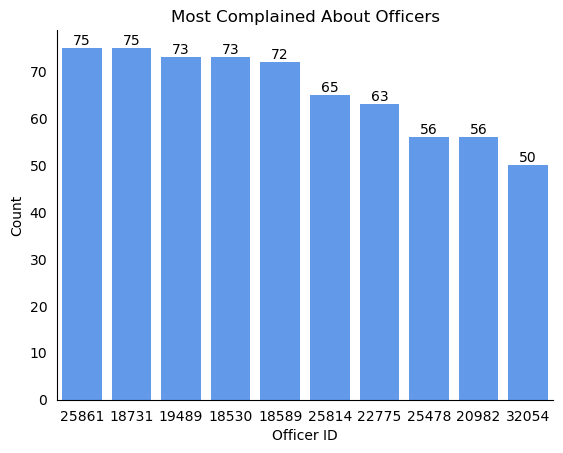

In [20]:
#making bar chart
t = sns.barplot(x=top10.index, y=top10, order=top10.sort_values(ascending=False).index, color = '#4d94ff');


#add labels
for bars in t.containers:
     t.bar_label(bars)

#add title and axis labels
plt.title('Most Complained About Officers')
plt.xlabel('Officer ID')
plt.ylabel('Count')

#removing spines
t.spines['top'].set_visible(False)
t.spines['right'].set_visible(False)

#removing ticks
plt.tick_params(bottom = False)
plt.tick_params(left = False)

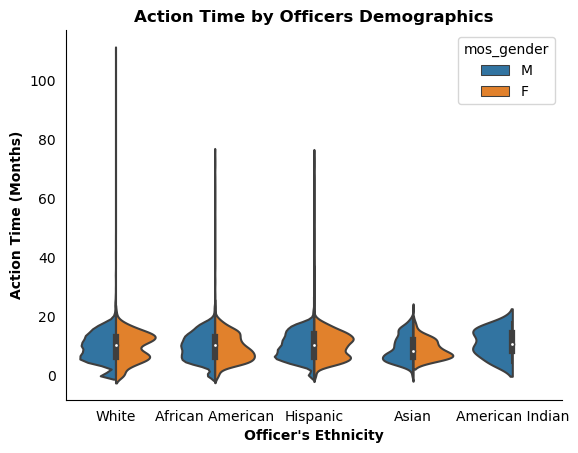

In [21]:
#violin plot based on reponse time and officers demographics
b = sns.violinplot(x='mos_ethnicity',y='Action Time (Months)', hue='mos_gender', data=df, split = True)

#setting titles 
b.set_title('Action Time by Officers Demographics', fontweight = 'bold')
b.set_xlabel('Officer\'s Ethnicity', fontweight = 'bold')
b.set_ylabel('Action Time (Months)', fontweight = 'bold')

#removing spines
b.spines['top'].set_visible(False)
b.spines['right'].set_visible(False)

#removing ticks
plt.tick_params(bottom = False)
plt.tick_params(left = False)

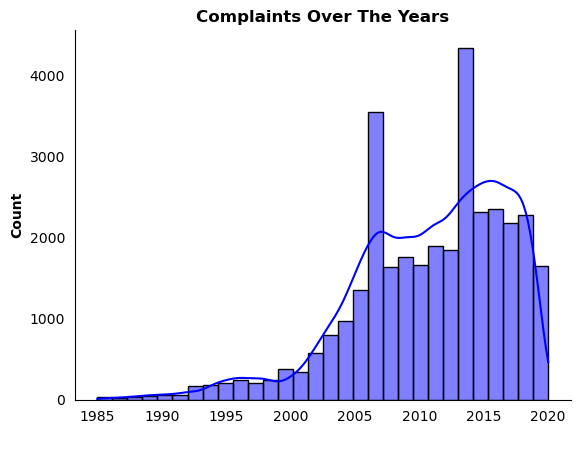

In [22]:
#Creating time series histogram
c = sns.histplot(data=df, x='year_received', color='blue', kde=True, bins=30, legend=True)

#setting titles 
c.set_title('Complaints Over The Years', fontweight = 'bold')
c.set_xlabel(' ')
c.set_ylabel('Count', fontweight = 'bold')

#removing spines
c.spines['top'].set_visible(False)
c.spines['right'].set_visible(False)

#removing ticks
plt.tick_params(bottom = False)
plt.tick_params(left = False)

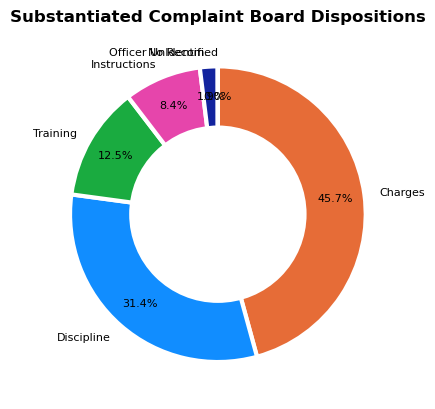

In [23]:
#Creating pie chart for board disposition
color = ['#E66C37', '#118DFF', '#1AAB40', '#E645AB', '#12239E', '#000000']
plt.pie(df.board_disposition_desc.value_counts(), labels=['Charges', 'Discipline', 'Training', 'Instructions',
                                                         'No Recom.', 'Officer UnIdentified'],
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, colors=color,
        autopct = '%.1f%%', radius = 1, textprops={'fontsize': 8}, startangle = 90, counterclock=False,
        pctdistance=0.8)

#adding a title to the plot
plt.title('Substantiated Complaint Board Dispositions', fontsize = 12, fontweight = 'bold')

#creating the inner circle to make donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [24]:
#grouping Officer Unidentified and No Recom. together to make plot clearer 
def sub_outcomes(board_disposition_desc):
    if isinstance(board_disposition_desc, str): 
        if any(keyword in board_disposition_desc for keyword in ['No Recom.']):
            return 'Other'
        elif any(keyword in board_disposition_desc for keyword in ['Officer Unidentified']):
            return 'Other'
        elif any(keyword in board_disposition_desc for keyword in ['Instructions']):
            return 'Instructions'
        elif any(keyword in board_disposition_desc for keyword in ['Training']):
            return 'Training'  
        elif any(keyword in board_disposition_desc for keyword in ['Discipline']):
            return 'Discpline'
        elif any(keyword in board_disposition_desc for keyword in ['Charges']):
            return 'Charges'
        else:
            return None
    else:
        return None
df['board_disposition_desc'] = df['board_disposition_desc'].apply(sub_outcomes)
df.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,Prec_Borough,Latitude,Longitude,date_received,date_closed,reason_for_contact,Action Time (Months),board_disposition,board_disposition_desc,Column
0,10779,Armando,Cardenio,084 PCT,19358,34887,4,2016,9,2016,...,Brooklyn,40.695322,-73.983090,"Friday, April 1, 2016","Thursday, September 1, 2016",PD suspected Violation/Crime,5,Unsubstantiated,None,8301
1,11010,Renan,Darbouze,088 PCT,13128,38799,1,2018,1,2019,...,Brooklyn,40.690077,-73.960504,"Monday, January 1, 2018","Tuesday, January 1, 2019",PD suspected Violation/Crime,12,Exonerated,None,8301
2,11232,Rafal,Korycki,090 PCT,1607,36075,11,2016,4,2017,...,Brooklyn,40.671098,-73.881429,"Tuesday, November 1, 2016","Saturday, April 1, 2017",PD suspected Violation/Crime,5,Unsubstantiated,None,8301
3,11232,Rafal,Korycki,090 PCT,1607,36075,11,2016,4,2017,...,Brooklyn,40.671098,-73.881429,"Tuesday, November 1, 2016","Saturday, April 1, 2017",PD suspected Violation/Crime,5,Exonerated,None,8301
4,11304,Stephen,Sheppard,090 PCT,13816,15603,3,2008,7,2009,...,Brooklyn,40.670828,-73.913594,"Saturday, March 1, 2008","Wednesday, July 1, 2009",PD suspected Violation/Crime,16,Unsubstantiated,None,8301


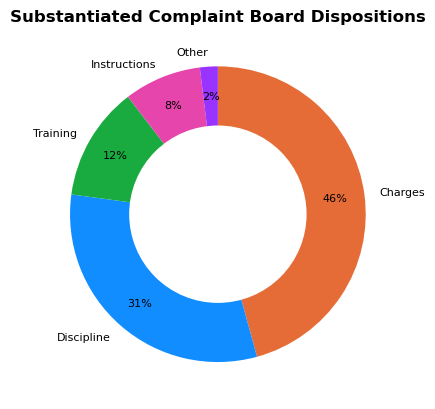

In [25]:
#Creating pie chart for board disposition
color = ['#E66C37', '#118DFF', '#1AAB40', '#E645AB', '#9933ff']
plt.pie(df.board_disposition_desc.value_counts(), labels=['Charges', 'Discipline', 'Training', 'Instructions',
                                                         'Other'],
        colors=color, autopct = '%1.0f%%', radius = 1, textprops={'fontsize': 8}, startangle = 90, 
        counterclock=False, pctdistance=0.8)

#adding a title to the plot
plt.title('Substantiated Complaint Board Dispositions', fontsize = 12, fontweight = 'bold')

#creating the inner circle to make donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)